Epoch 1/50
2711/2711 [==============================] - 18s 7ms/step - loss: 0.6520 - accuracy: 0.6164 - val_loss: 0.6215 - val_accuracy: 0.6576
Epoch 2/50
2711/2711 [==============================] - 17s 6ms/step - loss: 0.6147 - accuracy: 0.6618 - val_loss: 0.6147 - val_accuracy: 0.6590
Epoch 3/50
2711/2711 [==============================] - 18s 7ms/step - loss: 0.5953 - accuracy: 0.6782 - val_loss: 0.5888 - val_accuracy: 0.6819
Epoch 4/50
2711/2711 [==============================] - 21s 8ms/step - loss: 0.5817 - accuracy: 0.6884 - val_loss: 0.5691 - val_accuracy: 0.6986
Epoch 5/50
2711/2711 [==============================] - 22s 8ms/step - loss: 0.5718 - accuracy: 0.6928 - val_loss: 0.5628 - val_accuracy: 0.7001
Epoch 6/50
2711/2711 [==============================] - 20s 7ms/step - loss: 0.5638 - accuracy: 0.6972 - val_loss: 0.5617 - val_accuracy: 0.6981
Epoch 7/50
2711/2711 [==============================] - 19s 7ms/step - loss: 0.5571 - accuracy: 0.7021 - val_loss: 0.5540 - val_ac

Predicted  Female  Male
Actual                 
Female       4091  1071
Male         1663  4129


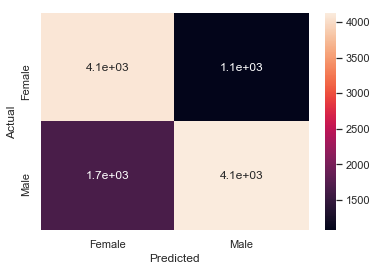

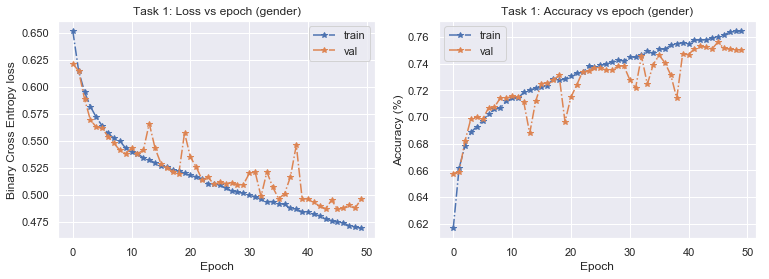

In [51]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Reshape, Activation, Dropout
from tensorflow.keras import optimizers

import time 
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt 
import numpy as np

from matplotlib import image
from sklearn.preprocessing import LabelEncoder

label_tr = pd.read_csv("fairface_label_train.csv")
label_te = pd.read_csv("fairface_label_val.csv")

# Load image dataset 
def load_img_dataset_with_label(df,label):
    x = []
    y = df[label].astype('category').cat.codes
    for i in range(len(df)):
        x.append(image.imread(df['file'][i]))
    return np.array(x, dtype='float32'), np.array(y)

x_train, y_train = load_img_dataset_with_label(label_tr, "gender")
x_test, y_test = load_img_dataset_with_label(label_te, "gender")

# Normalize using MinMax Scalar
def MinMaxScaling(a):
    return (a - a.min()) / (a.max() - a.min())

x_tr = MinMaxScaling(x_train)
x_te = MinMaxScaling(x_test)

# Label encoding
encoder = LabelEncoder()
encoder.fit(y_train)
y_tr = encoder.transform(y_train)
y_te =  encoder.transform(y_test)

# Build the model 
model = Sequential(name="task1")
model.add(Flatten())
model.add(layers.Dense(1024, activation='tanh'))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
                 optimizer=optimizers.SGD(learning_rate=0.001, momentum=0.9),
                 metrics=['accuracy'])

# Fit the model 
history = model.fit(x=x_tr, y=y_tr, 
                          epochs=50,
                          validation_data = (x_te,y_te),
                          verbose=1)

print(model.summary())

# Predict using the model 
pred = model.predict(x_te)
predicted_class_indices=np.argmax(pred,axis=1)
predicted_class_indices.shape
labels = {0: "Female", 1: "Male"}
predictions = [labels[k] for k in predicted_class_indices]

# Confusion matrix 
data = {'y_Actual':    label_te['gender'],
        'y_Predicted': predictions
        }

df_cm = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_cm['y_Actual'], df_cm['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

sns.heatmap(confusion_matrix, annot=True)
plt.show()

# Accuracy-vs-epoch and loss-vs-epoch
plt.figure(figsize=[12.5,4])
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'-.*', label='train')
plt.plot(history.history['val_loss'],'-.*', label='val')
plt.xlabel("Epoch")
plt.ylabel("Binary Cross Entropy loss")
plt.title("Task 1: Loss vs epoch (gender)")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'-.*', label='train')
plt.plot(history.history['val_accuracy'],'-.*', label='val')
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Task 1: Accuracy vs epoch (gender)")
plt.legend()
plt.show()


In [53]:
# Add another dimension for channel 
x_te = np.expand_dims(x_te,axis=3)
x_tr = np.expand_dims(x_tr,axis=3)

Epoch 1/50
2711/2711 [==============================] - 27s 10ms/step - loss: 0.6403 - accuracy: 0.6323 - val_loss: 0.6027 - val_accuracy: 0.6773
Epoch 2/50
2711/2711 [==============================] - 23s 9ms/step - loss: 0.5753 - accuracy: 0.6985 - val_loss: 0.5618 - val_accuracy: 0.7046
Epoch 3/50
2711/2711 [==============================] - 23s 9ms/step - loss: 0.5390 - accuracy: 0.7255 - val_loss: 0.5213 - val_accuracy: 0.7375
Epoch 4/50
2711/2711 [==============================] - 23s 9ms/step - loss: 0.5113 - accuracy: 0.7415 - val_loss: 0.5017 - val_accuracy: 0.7506
Epoch 5/50
2711/2711 [==============================] - 23s 8ms/step - loss: 0.4861 - accuracy: 0.7578 - val_loss: 0.4746 - val_accuracy: 0.7676
Epoch 6/50
2711/2711 [==============================] - 23s 9ms/step - loss: 0.4651 - accuracy: 0.7698 - val_loss: 0.4593 - val_accuracy: 0.7763
Epoch 7/50
2711/2711 [==============================] - 25s 9ms/step - loss: 0.4481 - accuracy: 0.7800 - val_loss: 0.4581 - val_a

Predicted  Female  Male
Actual                 
Female       3997  1165
Male         1063  4729


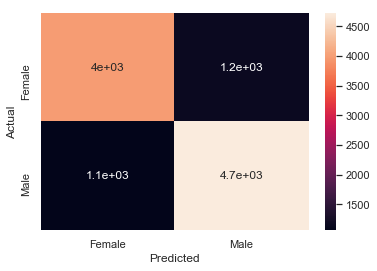

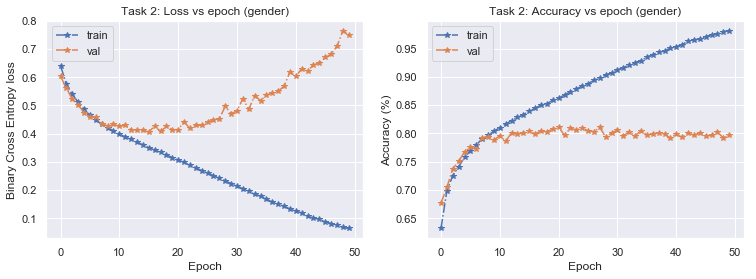

In [54]:
# Build the model (task2: gender)
model = Sequential()
model.add(layers.Conv2D(filters=40,kernel_size=5,strides=1,
                        padding='valid',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(2,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
                 optimizer=optimizers.SGD(learning_rate=0.0001, momentum=0.9),
                 metrics=['accuracy'])

# Fit the model 
history = model.fit(x=x_tr, y=y_tr, 
                          epochs=50,
                          validation_data = (x_te,y_te),
                          verbose=1)

print(model.summary())

# Predict using the model 
pred = model.predict(x_te)
predicted_class_indices=np.argmax(pred,axis=1)
predicted_class_indices.shape
labels = {0: "Female", 1: "Male"}
predictions = [labels[k] for k in predicted_class_indices]

# Confusion matrix 
data = {'y_Actual':    label_te['gender'],
        'y_Predicted': predictions
        }

df_cm = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_cm['y_Actual'], df_cm['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

sns.heatmap(confusion_matrix, annot=True)
plt.show()

# Accuracy-vs-epoch and loss-vs-epoch
plt.figure(figsize=[12.5,4])
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'-.*', label='train')
plt.plot(history.history['val_loss'],'-.*', label='val')
plt.xlabel("Epoch")
plt.ylabel("Binary Cross Entropy loss")
plt.title("Task 2: Loss vs epoch (gender)")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'-.*', label='train')
plt.plot(history.history['val_accuracy'],'-.*', label='val')
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Task 2: Accuracy vs epoch (gender)")
plt.legend()
plt.show()

Epoch 1/25
2711/2711 [==============================] - 176s 65ms/step - loss: 0.6737 - accuracy: 0.5816 - val_loss: 0.6542 - val_accuracy: 0.6196
Epoch 2/25
2711/2711 [==============================] - 176s 65ms/step - loss: 0.6532 - accuracy: 0.6160 - val_loss: 0.6312 - val_accuracy: 0.6410
Epoch 3/25
2711/2711 [==============================] - 179s 66ms/step - loss: 0.6245 - accuracy: 0.6466 - val_loss: 0.5817 - val_accuracy: 0.6892
Epoch 4/25
2711/2711 [==============================] - 179s 66ms/step - loss: 0.5809 - accuracy: 0.6894 - val_loss: 0.5424 - val_accuracy: 0.7200
Epoch 5/25
2711/2711 [==============================] - 179s 66ms/step - loss: 0.5533 - accuracy: 0.7115 - val_loss: 0.5171 - val_accuracy: 0.7397
Epoch 6/25
2711/2711 [==============================] - 180s 66ms/step - loss: 0.5335 - accuracy: 0.7248 - val_loss: 0.4944 - val_accuracy: 0.7525
Epoch 7/25
2711/2711 [==============================] - 179s 66ms/step - loss: 0.5162 - accuracy: 0.7357 - val_loss: 0

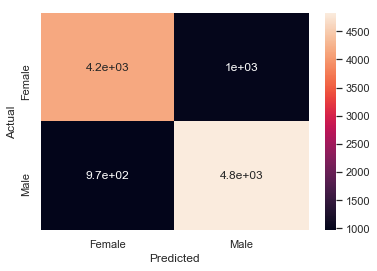

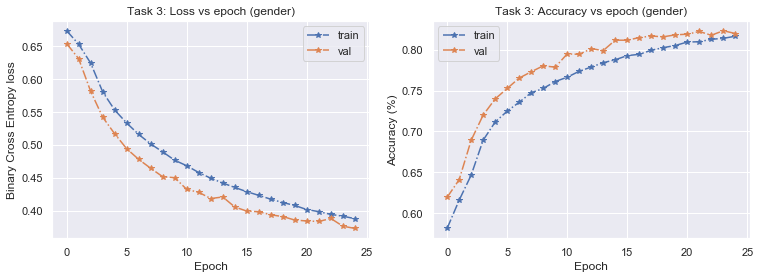

In [57]:
# Task 3: Your Own ConvNet (Gender)
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
                 optimizer=optimizers.SGD(learning_rate=0.001, momentum=0.9),
                 metrics=['accuracy'])


# Fit the model 
history = model.fit(x=x_tr, y=y_tr, 
                          epochs=25,
                          validation_data = (x_te,y_te),
                          verbose=1)

print(model.summary())

# Predict using the model 
pred = model.predict(x_te)
predicted_class_indices=np.argmax(pred,axis=1)
predicted_class_indices.shape
labels = {0: "Female", 1: "Male"}
predictions = [labels[k] for k in predicted_class_indices]

# Confusion matrix 
data = {'y_Actual':    label_te['gender'],
        'y_Predicted': predictions
        }

df_cm = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_cm['y_Actual'], df_cm['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

sns.heatmap(confusion_matrix, annot=True)
plt.show()

# Accuracy-vs-epoch and loss-vs-epoch
plt.figure(figsize=[12.5,4])
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'-.*', label='train')
plt.plot(history.history['val_loss'],'-.*', label='val')
plt.xlabel("Epoch")
plt.ylabel("Binary Cross Entropy loss")
plt.title("Task 3: Loss vs epoch (gender)")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'-.*', label='train')
plt.plot(history.history['val_accuracy'],'-.*', label='val')
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Task 3: Accuracy vs epoch (gender)")
plt.legend()
plt.show()


Epoch 1/50
2711/2711 [==============================] - 21s 8ms/step - loss: 1.8607 - accuracy: 0.2546 - val_loss: 1.8180 - val_accuracy: 0.2821
Epoch 2/50
2711/2711 [==============================] - 21s 8ms/step - loss: 1.7856 - accuracy: 0.3019 - val_loss: 1.7530 - val_accuracy: 0.3065
Epoch 3/50
2711/2711 [==============================] - 20s 8ms/step - loss: 1.7261 - accuracy: 0.3315 - val_loss: 1.7164 - val_accuracy: 0.3333
Epoch 4/50
2711/2711 [==============================] - 21s 8ms/step - loss: 1.6907 - accuracy: 0.3454 - val_loss: 1.7039 - val_accuracy: 0.3344
Epoch 5/50
2711/2711 [==============================] - 19s 7ms/step - loss: 1.6702 - accuracy: 0.3538 - val_loss: 1.6609 - val_accuracy: 0.3599
Epoch 6/50
2711/2711 [==============================] - 20s 7ms/step - loss: 1.6564 - accuracy: 0.3610 - val_loss: 1.6436 - val_accuracy: 0.3653
Epoch 7/50
2711/2711 [==============================] - 20s 7ms/step - loss: 1.6441 - accuracy: 0.3669 - val_loss: 1.6321 - val_ac

Predicted        Black  East Asian  Indian  Latino_Hispanic  Middle Eastern  \
Actual                                                                        
Black               14         972      96              145             178   
East Asian          18          51     213               43             262   
Indian              60         206     117              609             242   
Latino_Hispanic     59         118     165              203             447   
Middle Eastern     200          71      44              150             403   
Southeast Asian     14         109     423              114             205   
White               83         117      91              110            1167   

Predicted        Southeast Asian  White  
Actual                                   
Black                         89     62  
East Asian                    82    881  
Indian                       188     94  
Latino_Hispanic              469    162  
Middle Eastern               269    

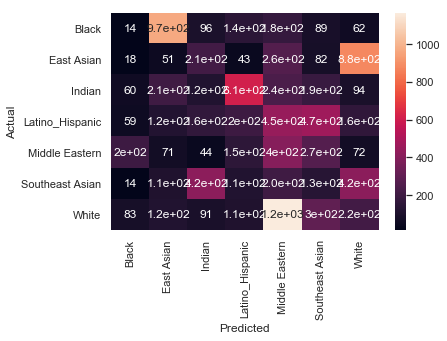

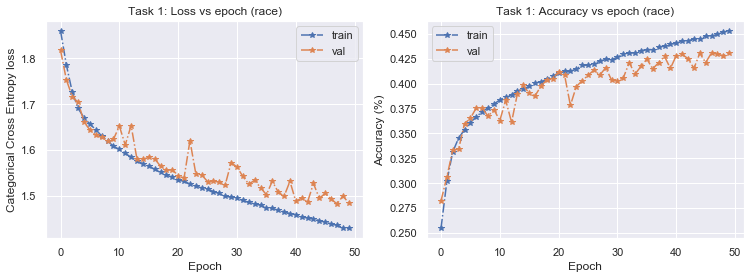

In [58]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Reshape, Activation, Dropout
from tensorflow.keras import optimizers

import time 
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt 
import numpy as np

from matplotlib import image
from sklearn.preprocessing import LabelEncoder

label_tr = pd.read_csv("fairface_label_train.csv")
label_te = pd.read_csv("fairface_label_val.csv")

# Load image dataset 
def load_img_dataset_with_label(df,label):
    x = []
    y = df[label].astype('category').cat.codes
    for i in range(len(df)):
        x.append(image.imread(df['file'][i]))
    return np.array(x, dtype='float32'), np.array(y)
    
x_train, y_train = load_img_dataset_with_label(label_tr, "race")
x_test, y_test = load_img_dataset_with_label(label_te, "race")

# Normalize using MinMax Scalar
def MinMaxScaling(a):
    return (a - a.min()) / (a.max() - a.min())

x_tr = MinMaxScaling(x_train)
x_te = MinMaxScaling(x_test)

# Label encoding
encoder = LabelEncoder()
encoder.fit(y_train)
y_tr = encoder.transform(y_train)
y_te =  encoder.transform(y_test)

# Build the model 
model = Sequential(name="task1")
model.add(Flatten())
model.add(layers.Dense(1024, activation='tanh'))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
                 optimizer=optimizers.SGD(learning_rate=0.001, momentum=0.9),
                 metrics=['accuracy'])

# Fit the model 
history = model.fit(x=x_tr, y=y_tr, 
                          epochs=50,
                          validation_data = (x_te,y_te),
                          verbose=1)

print(model.summary())

# Predict using the model 
pred = model.predict(x_te)
predicted_class_indices=np.argmax(pred,axis=1)
predicted_class_indices.shape
labels = {i:x for i,x in enumerate(label_te['race'].unique())}
predictions = [labels[k] for k in predicted_class_indices]

# Confusion matrix 
data = {'y_Actual':    label_te['race'],
        'y_Predicted': predictions
        }

df_cm = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_cm['y_Actual'], df_cm['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

sns.heatmap(confusion_matrix, annot=True)
plt.show()

# Accuracy-vs-epoch and loss-vs-epoch

plt.figure(figsize=[12.5,4])
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'-.*', label='train')
plt.plot(history.history['val_loss'],'-.*', label='val')
plt.xlabel("Epoch")
plt.ylabel("Categorical Cross Entropy loss")
plt.title("Task 1: Loss vs epoch (race)")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'-.*', label='train')
plt.plot(history.history['val_accuracy'],'-.*', label='val')
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Task 1: Accuracy vs epoch (race)")
plt.legend()
plt.show()

In [60]:
# Add another dimension for channel 
x_te = np.expand_dims(x_te,axis=3)
x_tr = np.expand_dims(x_tr,axis=3)

Epoch 1/50
2711/2711 [==============================] - 23s 8ms/step - loss: 1.8353 - accuracy: 0.2702 - val_loss: 1.7666 - val_accuracy: 0.3135
Epoch 2/50
2711/2711 [==============================] - 23s 9ms/step - loss: 1.7051 - accuracy: 0.3421 - val_loss: 1.6600 - val_accuracy: 0.3634
Epoch 3/50
2711/2711 [==============================] - 23s 9ms/step - loss: 1.6240 - accuracy: 0.3799 - val_loss: 1.6009 - val_accuracy: 0.3920
Epoch 4/50
2711/2711 [==============================] - 23s 9ms/step - loss: 1.5727 - accuracy: 0.4020 - val_loss: 1.5555 - val_accuracy: 0.4106
Epoch 5/50
2711/2711 [==============================] - 23s 9ms/step - loss: 1.5285 - accuracy: 0.4209 - val_loss: 1.5176 - val_accuracy: 0.4243
Epoch 6/50
2711/2711 [==============================] - 23s 9ms/step - loss: 1.4876 - accuracy: 0.4368 - val_loss: 1.4879 - val_accuracy: 0.4419
Epoch 7/50
2711/2711 [==============================] - 23s 9ms/step - loss: 1.4496 - accuracy: 0.4490 - val_loss: 1.4668 - val_ac

Predicted        Black  East Asian  Indian  Latino_Hispanic  Middle Eastern  \
Actual                                                                        
Black               28        1105     103              131              55   
East Asian          42          45     484               51             130   
Indian              80         166     127              787              93   
Latino_Hispanic    125         133     160              265             295   
Middle Eastern     308          51      62              184             276   
Southeast Asian     28         116     644              125              98   
White              210         103     124              163             986   

Predicted        Southeast Asian  White  
Actual                                   
Black                        112     22  
East Asian                   114    684  
Indian                       234     29  
Latino_Hispanic              592     53  
Middle Eastern               308    

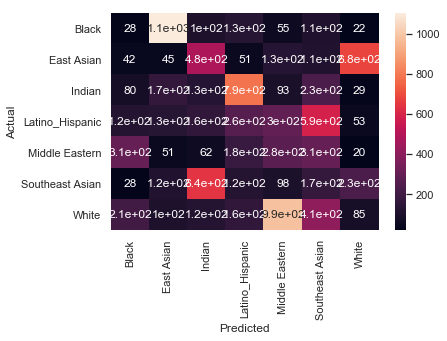

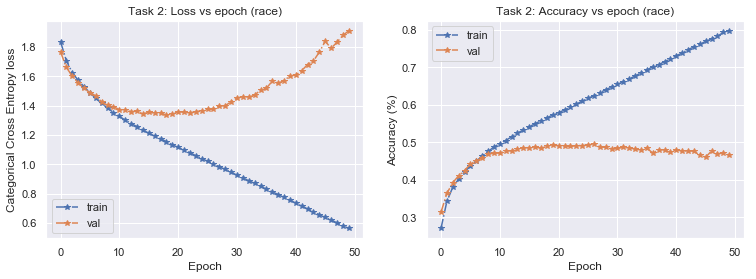

In [61]:
# Build the model 
model = Sequential()
model.add(layers.Conv2D(filters=40,kernel_size=5,strides=1,
                        padding='valid',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(7,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
                 optimizer=optimizers.SGD(learning_rate=0.001, momentum=0.9),
                 metrics=['accuracy'])

# Fit the model 
history = model.fit(x=x_tr, y=y_tr, 
                  epochs=50,
                  validation_data = (x_te,y_te),
                  verbose=1)

print(model.summary())

# Predict using the model 
pred = model.predict(x_te)
predicted_class_indices=np.argmax(pred,axis=1)
predicted_class_indices.shape
labels = {i:x for i,x in enumerate(label_te['race'].unique())}
predictions = [labels[k] for k in predicted_class_indices]

# Confusion matrix 
data = {'y_Actual':    label_te['race'],
        'y_Predicted': predictions
        }

df_cm = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_cm['y_Actual'], df_cm['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

sns.heatmap(confusion_matrix, annot=True)
plt.show()

# Accuracy-vs-epoch and loss-vs-epoch

plt.figure(figsize=[12.5,4])
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'-.*', label='train')
plt.plot(history.history['val_loss'],'-.*', label='val')
plt.xlabel("Epoch")
plt.ylabel("Categorical Cross Entropy loss")
plt.title("Task 2: Loss vs epoch (race)")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'-.*', label='train')
plt.plot(history.history['val_accuracy'],'-.*', label='val')
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Task 2: Accuracy vs epoch (race)")
plt.legend()
plt.show()

Epoch 1/25
2711/2711 [==============================] - 178s 66ms/step - loss: 1.8957 - accuracy: 0.2243 - val_loss: 1.8629 - val_accuracy: 0.2575
Epoch 2/25
2711/2711 [==============================] - 176s 65ms/step - loss: 1.8451 - accuracy: 0.2684 - val_loss: 1.8007 - val_accuracy: 0.3026
Epoch 3/25
2711/2711 [==============================] - 177s 65ms/step - loss: 1.7876 - accuracy: 0.2992 - val_loss: 1.7296 - val_accuracy: 0.3315
Epoch 4/25
2711/2711 [==============================] - 178s 65ms/step - loss: 1.7256 - accuracy: 0.3282 - val_loss: 1.6571 - val_accuracy: 0.3602
Epoch 5/25
2711/2711 [==============================] - 177s 65ms/step - loss: 1.6634 - accuracy: 0.3573 - val_loss: 1.5875 - val_accuracy: 0.3930
Epoch 6/25
2711/2711 [==============================] - 178s 66ms/step - loss: 1.6066 - accuracy: 0.3796 - val_loss: 1.5246 - val_accuracy: 0.4152
Epoch 7/25
2711/2711 [==============================] - 179s 66ms/step - loss: 1.5602 - accuracy: 0.3974 - val_loss: 1

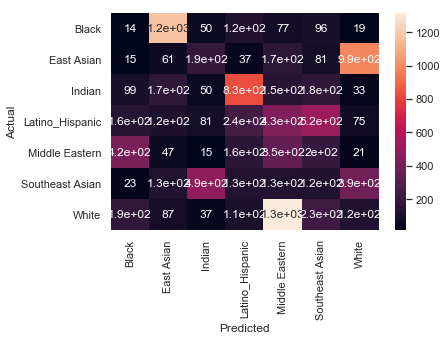

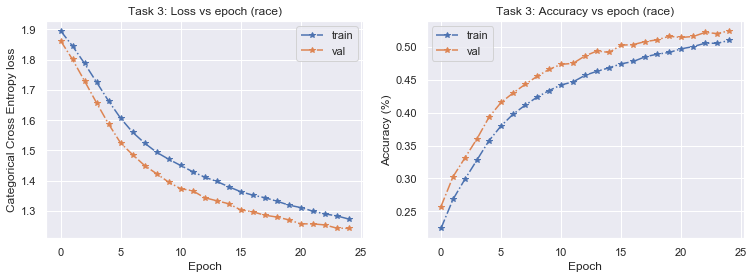

In [62]:
# Task 3: Your Own ConvNet (race)
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
                 optimizer=optimizers.SGD(learning_rate=0.001, momentum=0.9),
                 metrics=['accuracy'])

# Fit the model 
history = model.fit(x=x_tr, y=y_tr, 
                          epochs=25,
                          validation_data = (x_te,y_te),
                          verbose=1)

print(model.summary())

# Predict using the model 
pred = model.predict(x_te)
predicted_class_indices=np.argmax(pred,axis=1)
predicted_class_indices.shape
labels = {i:x for i,x in enumerate(label_te['race'].unique())}
predictions = [labels[k] for k in predicted_class_indices]

# Confusion matrix 
data = {'y_Actual':    label_te['race'],
        'y_Predicted': predictions
        }

df_cm = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_cm['y_Actual'], df_cm['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

sns.heatmap(confusion_matrix, annot=True)
plt.show()

# Accuracy-vs-epoch and loss-vs-epoch

plt.figure(figsize=[12.5,4])
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'-.*', label='train')
plt.plot(history.history['val_loss'],'-.*', label='val')
plt.xlabel("Epoch")
plt.ylabel("Categorical Cross Entropy loss")
plt.title("Task 3: Loss vs epoch (race)")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'-.*', label='train')
plt.plot(history.history['val_accuracy'],'-.*', label='val')
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Task 3: Accuracy vs epoch (race)")
plt.legend()
plt.show()

Epoch 1/30
2711/2711 [==============================] - 236s 87ms/step - loss: 2.5346 - dense_48_loss: 0.6599 - dense_49_loss: 1.8747 - dense_48_accuracy: 0.6035 - dense_49_accuracy: 0.2398 - val_loss: 2.4432 - val_dense_48_loss: 0.6262 - val_dense_49_loss: 1.8170 - val_dense_48_accuracy: 0.6470 - val_dense_49_accuracy: 0.2919
Epoch 2/30
2711/2711 [==============================] - 238s 88ms/step - loss: 2.3449 - dense_48_loss: 0.5868 - dense_49_loss: 1.7581 - dense_48_accuracy: 0.6842 - dense_49_accuracy: 0.3147 - val_loss: 2.2140 - val_dense_48_loss: 0.5317 - val_dense_49_loss: 1.6824 - val_dense_48_accuracy: 0.7341 - val_dense_49_accuracy: 0.3538
Epoch 3/30
2711/2711 [==============================] - 249s 92ms/step - loss: 2.1536 - dense_48_loss: 0.5258 - dense_49_loss: 1.6279 - dense_48_accuracy: 0.7321 - dense_49_accuracy: 0.3724 - val_loss: 2.0672 - val_dense_48_loss: 0.5012 - val_dense_49_loss: 1.5660 - val_dense_48_accuracy: 0.7496 - val_dense_49_accuracy: 0.4035
Epoch 4/30
27

Epoch 26/30
2711/2711 [==============================] - 234s 86ms/step - loss: 1.1505 - dense_48_loss: 0.2413 - dense_49_loss: 0.9092 - dense_48_accuracy: 0.8952 - dense_49_accuracy: 0.6557 - val_loss: 1.7845 - val_dense_48_loss: 0.4227 - val_dense_49_loss: 1.3619 - val_dense_48_accuracy: 0.8190 - val_dense_49_accuracy: 0.5130
Epoch 27/30
2711/2711 [==============================] - 232s 86ms/step - loss: 1.1198 - dense_48_loss: 0.2318 - dense_49_loss: 0.8881 - dense_48_accuracy: 0.9006 - dense_49_accuracy: 0.6658 - val_loss: 1.7590 - val_dense_48_loss: 0.4389 - val_dense_49_loss: 1.3201 - val_dense_48_accuracy: 0.8144 - val_dense_49_accuracy: 0.5177
Epoch 28/30
2711/2711 [==============================] - 237s 87ms/step - loss: 1.0858 - dense_48_loss: 0.2216 - dense_49_loss: 0.8641 - dense_48_accuracy: 0.9064 - dense_49_accuracy: 0.6735 - val_loss: 1.8724 - val_dense_48_loss: 0.5084 - val_dense_49_loss: 1.3640 - val_dense_48_accuracy: 0.7892 - val_dense_49_accuracy: 0.5126
Epoch 29/3

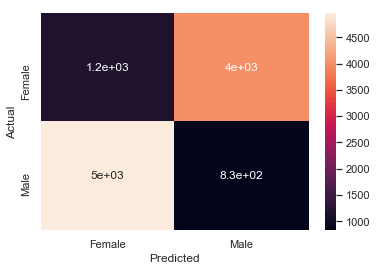

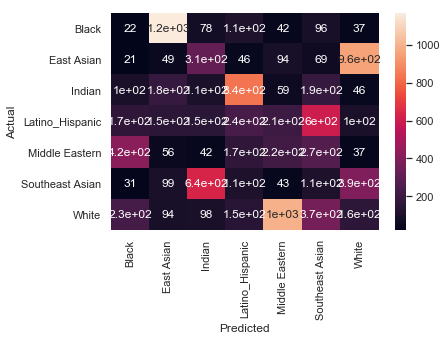

KeyError: 'dense_2_loss'

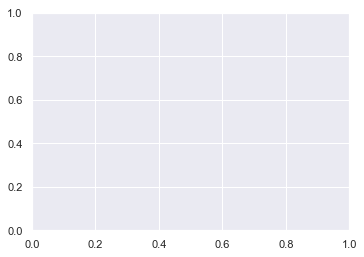

In [63]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Reshape, Activation, Dropout
from tensorflow.keras import optimizers

import time 
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt 
import numpy as np

from matplotlib import image
from sklearn.preprocessing import LabelEncoder

from proj3 import x_tr, x_te, y_tr, y_te 

label_tr = pd.read_csv("fairface_label_train.csv")
label_te = pd.read_csv("fairface_label_val.csv")

# Load image dataset 
def load_img_dataset_with_label(df,label):
    x = []
    y = df[label].astype('category').cat.codes
    for i in range(len(df)):
        x.append(image.imread(df['file'][i]))
    return np.array(x, dtype='float32'), np.array(y)

x_train, yg_train = load_img_dataset_with_label(label_tr, "gender")
x_test, yg_test = load_img_dataset_with_label(label_te, "gender")

yr_train = label_tr['race'].astype('category').cat.codes
yr_test  = label_te["race"].astype('category').cat.codes

# Normalize using MinMax Scalar
def MinMaxScaling(a):
    return (a - a.min()) / (a.max() - a.min())

x_tr = MinMaxScaling(x_train)
x_te = MinMaxScaling(x_test)

# Add another dimension for channel 
x_te = np.expand_dims(x_te,axis=3)
x_tr = np.expand_dims(x_tr,axis=3)

# Label encoding
encoder = LabelEncoder()
encoder.fit(yg_train)
yg_tr = encoder.transform(yg_train)
yg_te =  encoder.transform(yg_test)

encoder.fit(yr_train)
yr_tr = encoder.transform(yr_train)
yr_te =  encoder.transform(yr_test)

# Task 4: Your own ConvNet on both tasks simultaneously 
input = layers.Input(shape=(32,32,1))
conv1 = layers.Conv2D(filters=32,kernel_size=7,strides=1,
                    padding='same',activation='relu',
                    name='conv1')(input)
max1 = layers.MaxPool2D(pool_size=(3,3),strides=(2,2),
                        padding="same",name='pool1')(conv1)
lrn1 = tf.keras.layers.Lambda(
                    tf.nn.local_response_normalization)(max1)                  
conv2_1 = layers.Conv2D(filters=64,kernel_size=(1,1),
            padding="same",strides=1,activation="relu")(lrn1)
conv2_2 = layers.Conv2D(filters=64,kernel_size=(1,1),
            padding="same",strides=1,activation="relu")(lrn1)
conv3_1 = layers.Conv2D(filters=192,kernel_size=(3,3),
            padding="same",strides=1,activation="relu")(conv2_1)         
conv3_2 = layers.Conv2D(filters=192,kernel_size=(3,3),
            padding="same",strides=1,activation="relu")(conv2_2)
lrn2_1 = tf.keras.layers.Lambda(
                    tf.nn.local_response_normalization)(conv3_1)
lrn2_2 = tf.keras.layers.Lambda(
                    tf.nn.local_response_normalization)(conv3_2)            
max2_1 = layers.MaxPool2D(pool_size=(3,3),strides=(2,2),
            padding="same")(conv3_1)
max2_2 = layers.MaxPool2D(pool_size=(3,3),strides=(2,2),
            padding="same")(conv3_2)
fltn_1 = layers.Flatten()(max2_1)
fltn_2 = layers.Flatten()(max2_2)
fc1_1 = layers.Dense(10, activation='relu')(fltn_1)
fc1_2 = layers.Dense(35, activation='relu')(fltn_2)
fc2_1 = layers.Dense(2, activation="softmax")(fc1_1)
fc2_2 = layers.Dense(7, activation="softmax")(fc1_2)
# output = layers.concatenate([fc2_1, fc2_2], axis=1)

model = keras.Model(inputs=input,outputs=[fc2_1, fc2_2])

model.compile(loss='sparse_categorical_crossentropy', 
                 optimizer=optimizers.SGD(learning_rate=0.001, momentum=0.9),
                 metrics=['accuracy'])

# Fit the model 
history = model.fit(x=x_tr, y=[yg_tr, yr_tr], 
                          epochs=30,
                          validation_data = (x_te,[yg_te, yr_te]),
                          verbose=1)

print(model.summary())

# Predict using the model 
pred = model.predict(x_te)
predicted_class_indices_1=np.argmax(pred[0],axis=1)
predicted_class_indices_2=np.argmax(pred[1],axis=1)

labels_1 = {i:x for i,x in enumerate(label_te['gender'].unique())}
predictions_1 = [labels_1[k] for k in predicted_class_indices_1]

labels_2 = {i:x for i,x in enumerate(label_te['race'].unique())}
predictions_2 = [labels_2[k] for k in predicted_class_indices_2]

# Confusion matrix 
data_1 = {'y_Actual':    label_te['gender'],
        'y_Predicted': predictions_1
        }
data_2 = {'y_Actual':    label_te['race'],
        'y_Predicted': predictions_2
        }

df_cm_1 = pd.DataFrame(data_1, columns=['y_Actual','y_Predicted'])
confusion_matrix_1 = pd.crosstab(df_cm_1['y_Actual'], df_cm_1['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix_1)

df_cm_2 = pd.DataFrame(data_2, columns=['y_Actual','y_Predicted'])
confusion_matrix_2 = pd.crosstab(df_cm_2['y_Actual'], df_cm_2['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix_2)

# plt.figure(figsize=[12.5,4])
# plt.subplots(1,2,1)
sns.heatmap(confusion_matrix_1, annot=True)
plt.show()
# plt.subplots(1,2,2, figsize=[5,4])
sns.heatmap(confusion_matrix_2, annot=True)
plt.show()

# Accuracy-vs-epoch and loss-vs-epoch
plt.figure(figsize=[12.5,4])
plt.subplot(1,2,1)
plt.plot(history.history['dense_2_loss'],'-.*', label='train (gender)')
plt.plot(history.history['val_dense_2_loss'],'-.*', label='val (gender)')
plt.plot(history.history['dense_3_loss'],'-.*', label='train (race)')
plt.plot(history.history['val_dense_3_loss'],'-.*', label='val (race)')
plt.xlabel("Epoch")
plt.ylabel("Binary Cross Entropy loss")
plt.title("Task 4: Loss vs epoch (gender and race)")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['dense_2_accuracy'],'-.*', label='train (gender)')
plt.plot(history.history['val_dense_2_accuracy'],'-.*', label='val (gender)')
plt.plot(history.history['dense_3_accuracy'],'-.*', label='train (race)')
plt.plot(history.history['val_dense_3_accuracy'],'-.*', label='val (race)')
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Task 4: Accuracy vs epoch (gender and race)")
plt.legend()
plt.show()

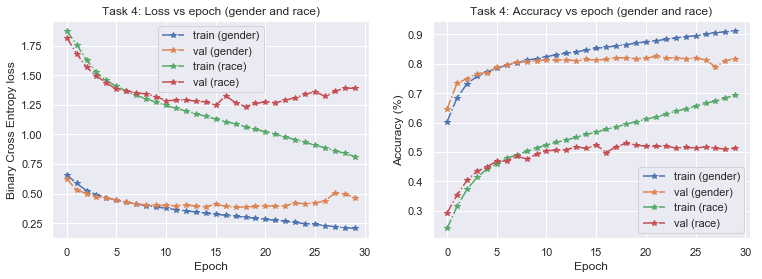

In [64]:

# Accuracy-vs-epoch and loss-vs-epoch
plt.figure(figsize=[12.5,4])
plt.subplot(1,2,1)
plt.plot(history.history['dense_48_loss'],'-.*', label='train (gender)')
plt.plot(history.history['val_dense_48_loss'],'-.*', label='val (gender)')
plt.plot(history.history['dense_49_loss'],'-.*', label='train (race)')
plt.plot(history.history['val_dense_49_loss'],'-.*', label='val (race)')
plt.xlabel("Epoch")
plt.ylabel("Binary Cross Entropy loss")
plt.title("Task 4: Loss vs epoch (gender and race)")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['dense_48_accuracy'],'-.*', label='train (gender)')
plt.plot(history.history['val_dense_48_accuracy'],'-.*', label='val (gender)')
plt.plot(history.history['dense_49_accuracy'],'-.*', label='train (race)')
plt.plot(history.history['val_dense_49_accuracy'],'-.*', label='val (race)')
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Task 4: Accuracy vs epoch (gender and race)")
plt.legend()
plt.show()

2711/2711 [==============================] - 189s 70ms/step - loss: 2.5159 - dense_103_loss: 0.6524 - dense_104_loss: 1.8635 - dense_103_accuracy: 0.6134 - dense_104_accuracy: 0.2491 - val_loss: 2.4137 - val_dense_103_loss: 0.6103 - val_dense_104_loss: 1.8034 - val_dense_103_accuracy: 0.6623 - val_dense_104_accuracy: 0.2971
Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 32)   1600        input_10[0][0]                   
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 16, 16, 32)   0         

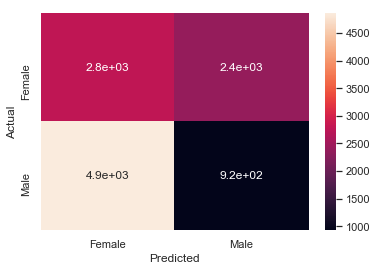

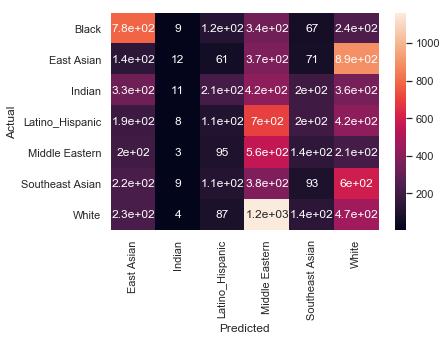

In [149]:
# Task 4: Your own ConvNet on both tasks simultaneously 
input = layers.Input(shape=(32,32,1))
conv1 = layers.Conv2D(filters=32,kernel_size=7,strides=1,
                    padding='same',activation='relu',
                    name='conv1')(input)
max1 = layers.MaxPool2D(pool_size=(3,3),strides=(2,2),
                        padding="same",name='pool1')(conv1)
lrn1 = tf.keras.layers.Lambda(
                    tf.nn.local_response_normalization)(max1)                  
conv2 = layers.Conv2D(filters=64,kernel_size=(1,1),
            padding="same",strides=1,activation="relu")(lrn1)
conv3 = layers.Conv2D(filters=192,kernel_size=(3,3),
            padding="same",strides=1,activation="relu")(conv2)         
lrn2 = tf.keras.layers.Lambda(
                    tf.nn.local_response_normalization)(conv3)         
max2 = layers.MaxPool2D(pool_size=(3,3),strides=(2,2),
            padding="same")(conv3)
fltn = layers.Flatten()(max2)
fc1_1 = layers.Dense(100, activation='relu')(fltn)
fc1_2 = layers.Dense(100, activation='relu')(fltn)
fc2_1 = layers.Dense(2, activation="softmax")(fc1_1)
fc2_2 = layers.Dense(7, activation="softmax")(fc1_2)
# output = layers.concatenate([fc2_1, fc2_2], axis=1)

model = keras.Model(inputs=input,outputs=[fc2_1, fc2_2])

model.compile(loss=['sparse_categorical_crossentropy', 'sparse_categorical_crossentropy'], 
                 optimizer=optimizers.SGD(learning_rate=0.001, momentum=0.9),
                 metrics=['accuracy'])


# Fit the model 
history = model.fit(x=x_tr, y=[yg_tr, yr_tr], 
                          epochs=1,
                          validation_data = (x_te,[yg_te, yr_te]),
                          verbose=1)

print(model.summary())

# Predict using the model 
pred = model.predict(x_te)
predicted_class_indices_1=np.argmax(pred[0],axis=1)
predicted_class_indices_2=np.argmax(pred[1],axis=1)

labels_1 = {i:x for i,x in enumerate(label_te['gender'].unique())}
predictions_1 = [labels_1[k] for k in predicted_class_indices_1]

labels_2 = {i:x for i,x in enumerate(label_te['race'].unique())}
predictions_2 = [labels_2[k] for k in predicted_class_indices_2]

# Confusion matrix 
data_1 = {'y_Actual':    label_te['gender'],
        'y_Predicted': predictions_1
        }
data_2 = {'y_Actual':    label_te['race'],
        'y_Predicted': predictions_2
        }

df_cm_1 = pd.DataFrame(data_1, columns=['y_Actual','y_Predicted'])
confusion_matrix_1 = pd.crosstab(df_cm_1['y_Actual'], df_cm_1['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix_1)

df_cm_2 = pd.DataFrame(data_2, columns=['y_Actual','y_Predicted'])
confusion_matrix_2 = pd.crosstab(df_cm_2['y_Actual'], df_cm_2['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix_2)

# plt.figure(figsize=[12.5,4])
# plt.subplots(1,2,1)
sns.heatmap(confusion_matrix_1, annot=True)
plt.show()
# plt.subplots(1,2,2, figsize=[5,4])
sns.heatmap(confusion_matrix_2, annot=True)
plt.show()

In [72]:
x_train, y_train = load_img_dataset_with_label(label_tr, "gender")
x_test, y_test = load_img_dataset_with_label(label_te, "gender")

# Normalize using MinMax Scalar
def MinMaxScaling(a):
    return (a - a.min()) / (a.max() - a.min())

x_tr = MinMaxScaling(x_train)
x_te = MinMaxScaling(x_test)

# Add another dimension for channel 
x_te = np.expand_dims(x_te,axis=3)
x_tr = np.expand_dims(x_tr,axis=3)

# Label encoding
encoder = LabelEncoder()
encoder.fit(y_train)
y_tr = encoder.transform(y_train)
y_te =  encoder.transform(y_test)

# reparameterization trick
# instead of sampling from Q(z|X), sample epsilon = N(0,I)
# z = z_mean + sqrt(var) * epsilon
from tensorflow.keras import backend as K

def sampling(args):
    """Reparameterization trick by sampling from an isotropic unit Gaussian.
    # Arguments
        args (tensor): mean and log of variance of Q(z|X)
    # Returns
        z (tensor): sampled latent vector
    """
    #Extract mean and log of variance
    z_mean, z_log_var = args
    #get batch size and length of vector (size of latent space)
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    
    # by default, random_normal has mean = 0 and std = 1.0
    epsilon = K.random_normal(shape=(batch, dim))
    #Return sampled number (need to raise var to correct power)
    return z_mean + K.exp(z_log_var) * epsilon



Model: "encoder_output"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
encoder_hl1 (Conv2D)            (None, 32, 32, 32)   1600        encoder_input[0][0]              
__________________________________________________________________________________________________
encoder_hl2 (Conv2D)            (None, 32, 32, 64)   18496       encoder_hl1[0][0]                
__________________________________________________________________________________________________
flatten_26 (Flatten)            (None, 65536)        0           encoder_hl2[0][0]                
_____________________________________________________________________________________

InvalidArgumentError:  Incompatible shapes: [256,32,32] vs. [256]
	 [[node gradient_tape/vae_mlp/tf_op_layer_AddV2_1/BroadcastGradientArgs (defined at <ipython-input-72-4b92fc3c16d7>:96) ]] [Op:__inference_train_function_2517682]

Function call stack:
train_function


In [85]:
# Task 5: Variational Auto Encoder (VAE)
# encoder
latent_dim = 5
inputs = Input(shape=(32,32,1), name='encoder_input')
encoder_hl1 = layers.Conv2D(16, kernel_size=3, strides=1, 
                    activation='relu', name='encoder_hl1',
                    padding='same')(inputs)
encoder_hl2 = layers.Conv2D(32, kernel_size=3, strides=1, 
                    activation='relu', name='encoder_hl2',
                    padding='same')(encoder_hl1)
encoder_flatten = layers.Flatten()(encoder_hl2)
dense = layers.Dense(32, activation='relu')(encoder_flatten)
z_mean = layers.Dense(latent_dim, name='z_mean')(dense)
z_log_var = layers.Dense(latent_dim, name='z_log_var')(dense)
z = layers.Lambda(sampling, name='z')([z_mean, z_log_var])
encoder = keras.Model(inputs,[z_mean,z_log_var,z], name='encoder_output')
print(encoder.summary())

Model: "encoder_output"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
encoder_hl1 (Conv2D)            (None, 32, 32, 16)   160         encoder_input[0][0]              
__________________________________________________________________________________________________
encoder_hl2 (Conv2D)            (None, 32, 32, 32)   4640        encoder_hl1[0][0]                
__________________________________________________________________________________________________
flatten_34 (Flatten)            (None, 32768)        0           encoder_hl2[0][0]                
_____________________________________________________________________________________

In [131]:
# # decoder
latent_inputs = Input(shape=(latent_dim,), name="z_sampling")
decoder_dense = layers.Dense(32*32*32, activation='relu')(latent_inputs)
decoder_reshape = layers.Reshape((32,32,32))(decoder_dense)
decoder_hl1 = layers.Conv2DTranspose(32, kernel_size=3, strides=1,
                activation='relu', name='decoder_hl1',
                padding='same')(decoder_reshape)
decoder_hl2 = layers.Conv2DTranspose(16, kernel_size=7,strides=1,
                activation='relu', name='decoder_hl2',
                padding='same')(decoder_hl1)
decoder_outputs = layers.Conv2DTranspose(1,kernel_size=3, activation="relu",
                padding='same', name="output")(decoder_hl2)

decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
print(decoder.summary())

encoder(inputs)
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

#setting loss
reconstruction_loss = keras.losses.mse(inputs, outputs)
reconstruction_loss *=1
# kl_loss = K.exp(z_log_var) + K.square(z_mean) - z_log_var - 1
# kl_loss = K.sum(kl_loss, axis=-1)
# kl_loss *= 0.001
kl_loss = 0
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam', metrics=['accuracy'])

# Fit the model 
history = vae.fit(x=x_tr, y=x_tr, 
                          epochs=1,
#                           batch_size=256,
#                           shuffle=True,
                          validation_data = (x_te,x_te),
                          verbose=1)

print(vae.summary())

# # Predict using the model 
# pred = vae.predict(x_te)

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
z_sampling (InputLayer)      [(None, 5)]               0         
_________________________________________________________________
dense_96 (Dense)             (None, 32768)             196608    
_________________________________________________________________
reshape_25 (Reshape)         (None, 32, 32, 32)        0         
_________________________________________________________________
decoder_hl1 (Conv2DTranspose (None, 32, 32, 32)        9248      
_________________________________________________________________
decoder_hl2 (Conv2DTranspose (None, 32, 32, 16)        25104     
_________________________________________________________________
output (Conv2DTranspose)     (None, 32, 32, 1)         145       
Total params: 231,105
Trainable params: 231,105
Non-trainable params: 0
_____________________________________________________

In [132]:
pred = vae.predict(x_te)

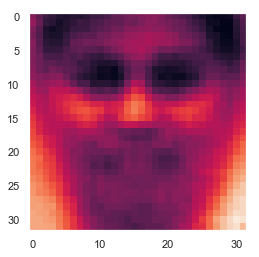

In [137]:
plt.rcParams["axes.grid"] = False
plt.imshow(pred[0][:,:,0])

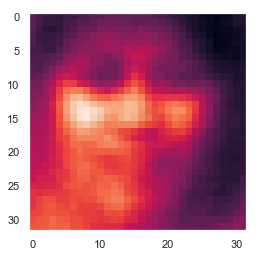

In [139]:
plt.imshow(pred[10][:,:,0])

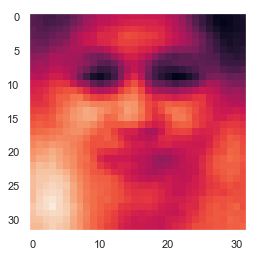

In [140]:
plt.imshow(pred[100][:,:,0])

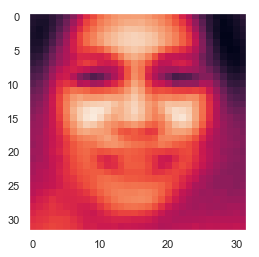

In [141]:
plt.imshow(pred[1000][:,:,0])

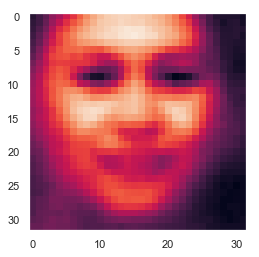

In [142]:
plt.imshow(pred[500][:,:,0])

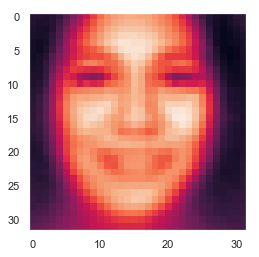

In [143]:
plt.imshow(pred[101][:,:,0])

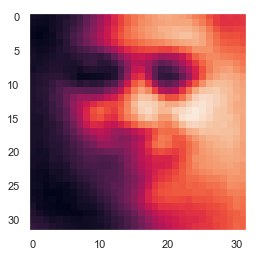

In [144]:
plt.imshow(pred[1110][:,:,0])

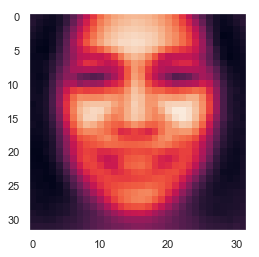

In [145]:
plt.imshow(pred[9][:,:,0])

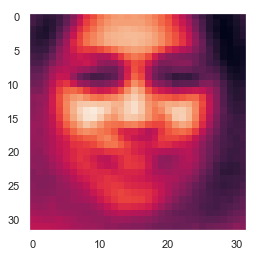

In [146]:
plt.imshow(pred[90][:,:,0])

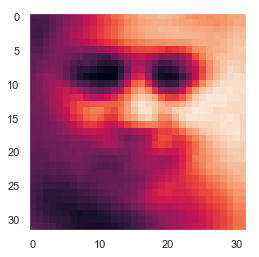

In [147]:
plt.imshow(pred[109][:,:,0])